# K Means Clustering

## Objective:
1. Partition observations into K clusters such that the total within cluster variation across all K clusters is minimum. 
i.e. Minimum(Sum of Within cluster variation for the K clusters)

2. Within cluster variation is determined most commonly using squared Euclidean distance. 
i.e. Within cluster variation (referred to as ***inertia***)= Sum of all pairwise squared Euclidean distances between observations in the Kth cluster, divided by total number of observations in the Kth cluster

3. Each observation is assigned to a cluster and no observation belongs to more than one cluster

## Algorithm:
1. Randomly assign a number from 1 to K to each observation as initial cluster assignments
2. Iterate until cluster assignments stop changing:
    a. For each K cluster, compute cluster centroid (Centroid is the 
    b. Assign each cluster to the closest centroid by terms of Euclidean distance
    
## Disadvantages to K Means clustering
1. Need to pre-specify number of clusters
2. Standardization may be required for some variables 
3. Validation of clusters (are these true sub-groups or clustered noise) is difficult as there is no consensus on the single best approach. (Robustness can possibly be assessed by clustering the subsets of the data as well)
4. Presence of outliers can distort the data significantly

## Steps:
1. Standardize/normalize the data
as clustering is based on the magnitude of data values, most data points should be on the same scale in order to avoid misrepresentation

2. Identify optimum number of clusters using Elbow method
Plot number of clusters vs the minimum Squared Euclidean distance
Identify elbow point where the minimum Euclidean distance is achieved by the least number of clusters

3. Utilize identified cluster number to determine final clusters 


# K Means Clustering of Mall Customer data

In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

mall=pd.read_csv("Mall_Customers.csv")


 Top 5 rows
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Descriptive Statistics
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000 

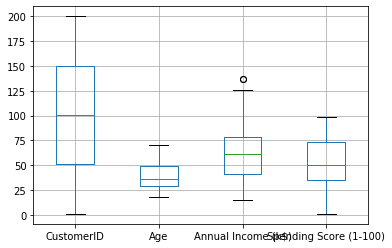

In [81]:
#Checking the data for missing values, outliers, ranges, etc. 
print("\n Top 5 rows")
print(mall.head())
print("\n Descriptive Statistics")
print(mall.describe())
print("\n Number of Missing Values")
print(mall.isnull().sum())
print("\n Outlier check")
print(mall.boxplot())


Removed Outlier in Annual Income


 Outlier removal
AxesSubplot(0.125,0.125;0.775x0.755)


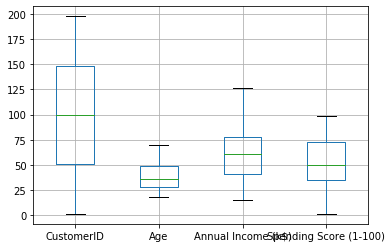

In [103]:
mall=mall[mall["Annual Income (k$)"]!=137]
print("\n Outlier removal")
print(mall.boxplot())

Vanilla K-Means does not accept categorical data. Hence this code utilizes only the numerical data to perform simple clustering. 

In [104]:
x = mall.iloc[:, [2,3,4]].values

Normalize the clustering variables to the same scale [0,1]

In [105]:
normalized_x=preprocessing.normalize(x)
#normalized_x=x

Identify the optimal number of clusters using the Elbow method 
i.e Run 1-15 clusters and identify the "elbow" point where the curve between the inertia and #clusters starts to flatten out

In [106]:
inertia=[]
for i in range(1,16):
    kmm=KMeans(n_clusters=i).fit(normalized_x)
    inertia.append(kmm.inertia_)

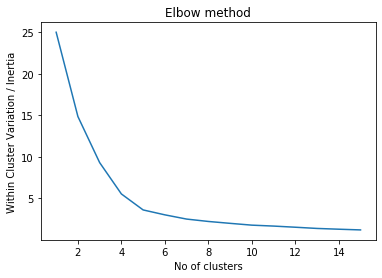

In [107]:
plt.plot(range(1, 16), inertia)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Within Cluster Variation / Inertia')
plt.show()

For this dataset, the optimal number of clusters is 5 based on the elbow point

In [108]:
kmm=KMeans(n_clusters=5).fit_predict(normalized_x)
print(kmm)

[4 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 0 4 3 4 3 4 0 4 0 4 3 4 3 4 3 4 3
 4 0 4 3 4 0 4 0 4 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing the data and clusters

Text(0, 0.5, 'Annual Income')

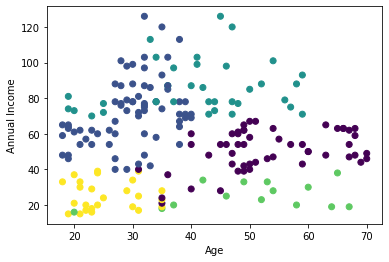

In [109]:
plt.scatter(x[:,0],x[:,1],c=kmm)
plt.xlabel("Age")
plt.ylabel("Annual Income")

Text(0, 0.5, 'Spending Score')

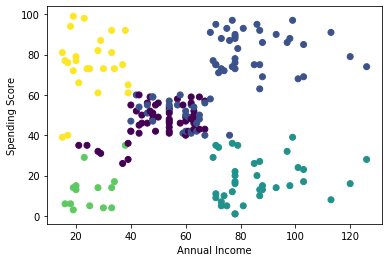

In [110]:
plt.scatter(x[:,1],x[:,2],c=kmm)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

Text(0, 0.5, 'Spending Score')

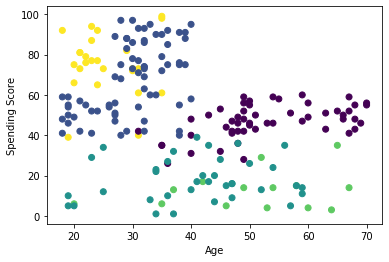

In [111]:
plt.scatter(x[:,0],x[:,2],c=kmm)
plt.xlabel("Age")
plt.ylabel("Spending Score")